# 数据读取

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_diabetes()
X,y = data.data,data.target

In [6]:
import pandas as pd 
X = pd.DataFrame(X,columns=data.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
X.shape

(442, 10)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [9]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3753.6048


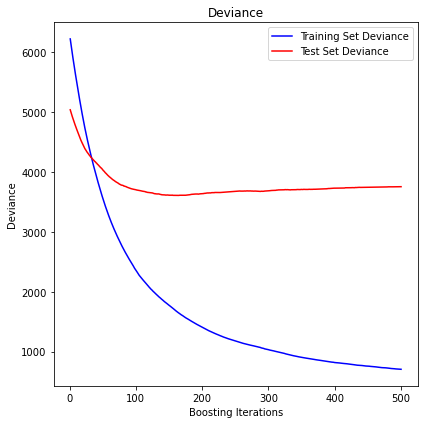

In [10]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

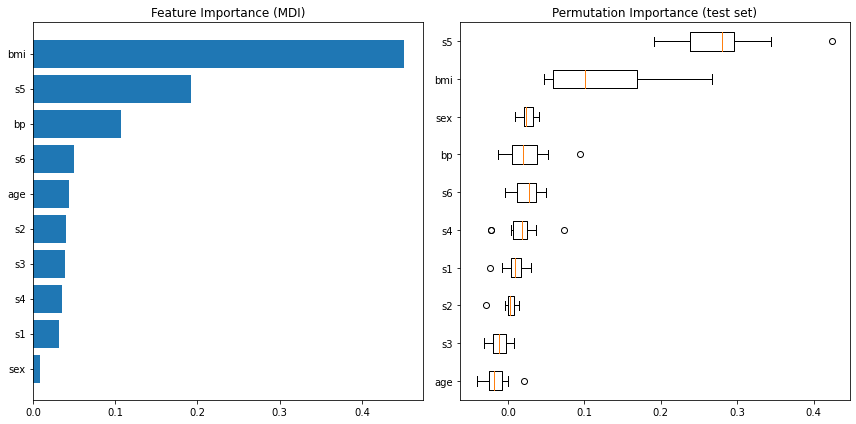

In [13]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(data.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
def Tuning(cv_params, other_params,x_train_array,y_train_):
    model2 = ensemble.GradientBoostingRegressor(**other_params)
    optimized_GBM = GridSearchCV(estimator=model2, 
                                 param_grid=cv_params,
                                 scoring='neg_mean_squared_error',
                                 cv=5, 
                                 n_jobs=-1)
    optimized_GBM.fit(x_train_array, y_train_)
    evalute_result = optimized_GBM.cv_results_['mean_test_score']
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
    return optimized_GBM

In [24]:
other_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
cv_params = {
    'n_estimators':np.arange(100,1000,20)
}
opt = Tuning(cv_params,other_params,X_train,y_train)

每轮迭代运行结果:[-3638.72054129 -3508.14247212 -3439.1105988  -3411.26966851
 -3379.19731255 -3360.20487765 -3352.48712657 -3338.42691658
 -3336.43127856 -3348.41175323 -3358.69080437 -3363.01002418
 -3364.25552115 -3368.95643225 -3371.23084952 -3366.64895522
 -3368.50938829 -3364.62376276 -3364.70394263 -3366.93076129
 -3371.23803066 -3359.48064698 -3369.62505326 -3369.78598905
 -3365.66586979 -3370.87512061 -3369.83259861 -3376.26242639
 -3380.41740687 -3382.51960697 -3386.68937081 -3386.81829059
 -3384.7963568  -3392.2026194  -3392.36595787 -3388.17242236
 -3392.12277562 -3398.91747749 -3398.48180057 -3403.58209999
 -3402.30716946 -3414.45002626 -3407.77365138 -3411.9467736
 -3415.43530731]
参数的最佳取值：{'n_estimators': 260}
最佳模型得分:-3336.431278559966


Text(0, 0.5, 'MSE')

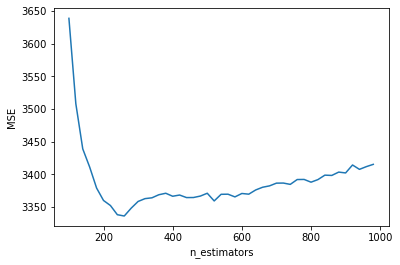

In [25]:
plt.plot(np.arange(100,1000,20),-opt.cv_results_['mean_test_score'] )
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [29]:
other_params = {'n_estimators': 260,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
cv_params = {
    'max_depth':np.arange(1,10,1),
    'min_samples_split':np.arange(1,10,1) 
}
opt = Tuning(cv_params,other_params,X_train,y_train)

每轮迭代运行结果:[           nan -3453.55583329 -3453.55583329 -3453.55583329
 -3453.55583329 -3453.55583329 -3453.55583329 -3453.55583329
 -3453.55583329            nan -3237.90479366 -3237.67289372
 -3237.45142037 -3237.68103247 -3237.67289372 -3237.68103247
 -3236.78414973 -3235.4499951             nan -3250.74529652
 -3254.45251943 -3253.21801558 -3243.64809922 -3243.30183639
 -3235.14340157 -3244.82045334 -3242.35242613            nan
 -3355.95471162 -3360.62349942 -3338.32275136 -3339.72429801
 -3334.6454409  -3347.79331607 -3354.73331653 -3336.45159072
            nan -3509.94657776 -3520.39063496 -3550.73975953
 -3500.9324746  -3504.3208005  -3507.2927551  -3495.2493565
 -3520.18842566            nan -3788.9065026  -3704.52349726
 -3771.5302907  -3718.43154173 -3684.04212671 -3638.52076809
 -3613.72731613 -3626.09529817            nan -4138.08200942
 -4064.96237157 -4059.46113609 -3808.23138872 -3772.45499181
 -3767.67837104 -3664.89014985 -3671.63515663            nan
 -4292.00667166 

Text(33.0, 0.5, 'min_samples_split')

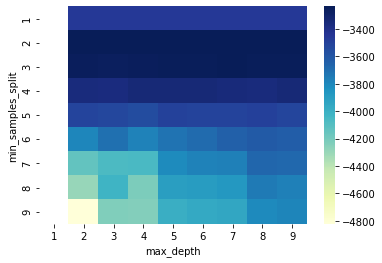

In [43]:
import seaborn as sns
tem = pd.DataFrame(opt.cv_results_['mean_test_score'].reshape((9,9)),index=np.arange(1,10),columns=np.arange(1,10))
ax = sns.heatmap(tem, cmap="YlGnBu")
ax.set_xlabel('max_depth')
ax.set_ylabel('min_samples_split')

In [49]:
other_params = {'n_estimators': 260,
          'max_depth': 3,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls'}
cv_params = {
    'learning_rate':np.arange(0.001,0.15,0.002)
}
opt = Tuning(cv_params,other_params,X_train,y_train)

每轮迭代运行结果:[-5090.71944225 -3845.05212113 -3417.5273061  -3265.14970145
 -3241.40913551 -3251.13260325 -3268.19604547 -3272.649416
 -3263.96975898 -3280.53948994 -3286.26207704 -3286.26587173
 -3269.90531332 -3298.79342194 -3288.53832222 -3307.99225882
 -3288.13691548 -3332.82450247 -3322.07393745 -3376.15111667
 -3350.48082774 -3384.51386583 -3380.08816873 -3374.37578837
 -3467.71684347 -3411.99228121 -3410.86145503 -3449.86503891
 -3435.57844748 -3425.47660987 -3449.68465379 -3470.64282452
 -3498.73422247 -3486.79052737 -3515.93874366 -3495.58656961
 -3414.83130408 -3504.96138971 -3499.34007735 -3500.92962273
 -3471.87179811 -3523.44306855 -3470.4962579  -3555.47838841
 -3488.43021746 -3485.1058102  -3503.1991377  -3504.9920395
 -3645.26374353 -3586.15554933 -3586.37086011 -3562.26475834
 -3656.24829656 -3596.39360247 -3669.45092429 -3603.37561538
 -3696.70074299 -3577.8236446  -3688.14665007 -3592.38420614
 -3614.35427872 -3604.95552426 -3590.33626323 -3607.23228692
 -3522.61196885 -3

Text(0, 0.5, 'MSE')

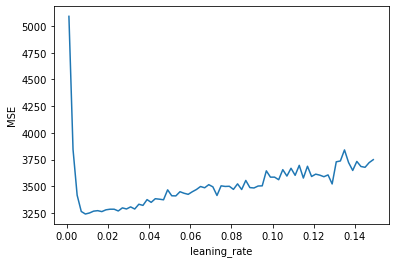

In [51]:
plt.plot(np.arange(0.001,0.15,0.002),-opt.cv_results_['mean_test_score'] )
plt.xlabel('leaning_rate')
plt.ylabel('MSE')

In [52]:
mse = mean_squared_error(y_test, opt.best_estimator_.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3396.9532
